拟合的参数值为： [ 15.3914543    0.23111521 -14.76199989]


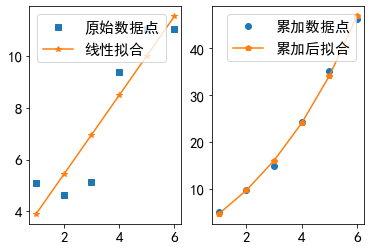

In [1]:
import numpy as np
from matplotlib.pyplot import plot,show,rc,legend,subplot
from scipy.optimize import curve_fit



rc('font',size=15);rc('font',family='SimHei');t0=np.arange(1,7)
x0=np.array([5.081, 4.611, 5.1177, 9.3775, 11.0574, 11.0524])
xt=np.polyfit(t0,x0,1); xh1=np.polyval(xt,t0)  #计算预测值
delta1=abs((xh1-x0))/x0   #计算相对误差
x1=np.cumsum(x0)
xh2=lambda t,a,b,c: a*np.exp(b*t)+c
para, cov=curve_fit(xh2, t0, x1)
xh21=xh2(t0,*para) #计算累加数列的预测值
xh22=np.r_[xh21[0],np.diff(xh21)]  #计算预测值
delta2=np.abs((xh22-x0)/x0)  #计算相对误差
print("拟合的参数值为：", para); subplot(121)
plot(t0,x0,'s'); plot(t0,xh1,'*-')
legend(('原始数据点','线性拟合'),loc='upper left')
subplot(122); plot(t0,x1,'o'); plot(t0,xh21,'p-')
legend(('累加数据点','累加后拟合')); show()

1995~2002的预测值： [25723.         31327.3567122  34081.56224489 37077.90911705
 40337.68565577 43884.05179287 47742.20361062 51939.55235392]

-------------------
 相对误差 [0.         3.12175092 1.13549083 3.65620601 0.43519362 3.50012215
 1.23051987]


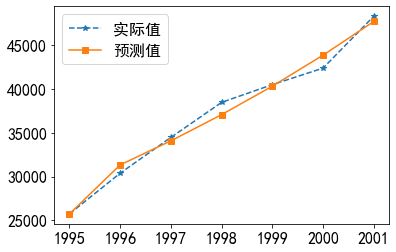

In [2]:
import numpy as np
import sympy as sp
from matplotlib.pyplot import plot,show,rc,legend,xticks




rc('font',size=16); rc('font',family='SimHei')
x0=np.array([25723,30379,34473,38485,40514,42400,48337])
n=len(x0); jibi=x0[:-1]/x0[1:]  #求级比
bd1=[jibi.min(),jibi.max()]    #求级比范围
bd2=[np.exp(-2/(n+1)),np.exp(2/(n+1))]   #q求级比的容许范围
x1=np.cumsum(x0)  #求累加序列
z=(x1[:-1]+x1[1:])/2.0
B=np.vstack([-z,np.ones(n-1)]).T
u=np.linalg.pinv(B)@x0[1:] #最小二乘法拟合参数

sp.var('t'); sp.var('x',cls=sp.Function)  #定义符号变量和函数
eq=x(t).diff(t)+u[0]*x(t)-u[1]  #定义符号微分方程
xt=sp.dsolve(eq,ics={x(0):x0[0]})  #求解符号微分方程
xt=xt.args[1]  #提取方程中的符号解
xt=sp.lambdify(t,xt,'numpy')  #转换为匿名函数
t=np.arange(n+1)
xt1=xt(t)  #求模型的预测值 
x0_pred=np.hstack([x0[0],np.diff(xt1)]) #还原数据
x2002=x0_pred[-1]  #提取2002年的预测值
cha=x0-x0_pred[:-1]; delta=np.abs(cha/x0)*100
print('1995~2002的预测值：',x0_pred)
print('\n-------------------\n','相对误差',delta)
t0=np.arange(1995,2002); plot(t0,x0,'*--')
plot(t0,x0_pred[:-1],'s-'); legend(('实际值','预测值'));
xticks(np.arange(1995,2002)); show()

In [3]:
import numpy as np
from scipy.integrate import odeint



a=np.loadtxt("./数据集/Pdata15_3.txt")  #加载表中的后4列数据
n=a.shape[0]  #观测数据的个数
x10=a[:,0]; x20=a[:,1]; x30=a[:,2]; x40=a[:,3]
x11=np.cumsum(x10); x21=np.cumsum(x20)
x31=np.cumsum(x30); x41=np.cumsum(x40)
z1=(x11[:-1]+x11[1:])/2.; z2=(x21[:-1]+x21[1:])/2.
z3=(x31[:-1]+x31[1:])/2.; z4=(x41[:-1]+x41[1:])/2.
B1=np.c_[z1,np.ones((n-1,1))]
u1=np.linalg.pinv(B1).dot(x10[1:]); print(u1)
B2=np.c_[z1,z2]
u2=np.linalg.pinv(B2).dot(x20[1:]); print(u2)
B3=np.c_[z3,np.ones((n-1,1))];
u3=np.linalg.pinv(B3).dot(x30[1:]); print(u3)
B4=np.c_[z1,z3,z4]
u4=np.linalg.pinv(B4).dot(x40[1:]); print(u4)


def Pfun(x,t):
    x1, x2, x3, x4 = x;
    return np.array([u1[0]*x1+u1[1], u2[0]*x1+u2[1]*x2,\
        u3[0]*x3+u3[1], u4[0]*x1+u4[1]*x3+u4[2]*x4])



t=np.arange(0, 14);
X0=np.array([7.1230,0.7960,13.1080,27.475])
s1=odeint(Pfun, X0, t); s2=np.diff(s1,axis=0)
xh=np.vstack([X0,s2])
cha=a-xh[:-1,:]  #计算残差
delta=np.abs(cha/a)  #计算相对误差
maxd=delta.max(0)  #计算每个指标的最大相对误差
pre=xh[-1,:]; print("最大相对误差：",maxd,"\n预测值为：",pre)


[-0.03781356  8.6667348 ]
[ 0.05681482 -0.22318458]
[-1.13858518e-02  1.24938166e+01]
[-0.61790385  5.69496608 -2.18261089]
最大相对误差： [0.13161393 0.49228926 0.23520444 0.20570548] 
预测值为： [ 5.23470673  1.45993391 10.70700942 26.57561822]


In [4]:
import numpy as np
from sympy import Function, diff, dsolve, symbols, solve,exp



x0=np.array([41, 49, 61, 78, 96, 104])
n=len(x0); x1=np.cumsum(x0)  #计算1次累加序列
ax0=np.diff(x0)  #计算一次累减序列
z=0.5*(x1[1:]+x1[:-1])  #计算均值生成序列
B=np.c_[-x0[1:],-z,np.ones((n-1,1))]
u=np.linalg.pinv(B).dot(ax0)
p=np.r_[1,u[:-1]]  #构造特征多项式
r=np.roots(p)  #求特征根
xts=u[2]/u[1]  #常微分方程的特解
c1,c2,t=symbols('c1,c2,t'); eq1=c1+c2+xts-41;
eq2=c1*np.exp(5*r[0])+c2*np.exp(5*r[1])+xts-429
c=solve([eq1,eq2],[c1,c2])
s=c[c1]*exp(r[0]*t)+c[c2]*exp(r[1]*t)+xts  #微分方程的符号解
xt1=[]
for i in range(6):
    xt1.append(s.subs({t:i}))
xh0=np.r_[xt1[0],np.diff(xt1)]
cha=x0-xh0  #计算残差
delta=np.abs(cha)/x0  #计算相对误差
print(xt1,'\n------------\n',xh0,'\n------------\n',\
    cha,'\n--------------\n',delta)

[40.9999999999997, 92.0148144078680, 155.156052197627, 232.367192369488, 324.521982077495, 428.999999999999] 
------------
 [40.9999999999997 51.0148144078683 63.1412377897588 77.2111401718612
 92.1547897080066 104.478017922505] 
------------
 [2.84217094304040e-13 -2.01481440786830 -2.14123778975878
 0.788859828138840 3.84521029199340 -0.478017922504876] 
--------------
 [6.93212425131805e-15 0.0411186613850674 0.0351022588485045
 0.0101135875402415 0.0400542738749312 0.00459632617793150]


In [5]:
import numpy as np
import sympy as sp



x0=np.array([41,49,61,78,96,104])
n=len(x0)
lamda=x0[:-1]/x0[1:]  #计算级比
rang=[lamda.min(), lamda.max()]  #计算级比的范围
theta=[np.exp(-2/(n+1)),np.exp(2/(n+1))] #计算级比容许范围
x1=np.cumsum(x0)  #累加运算
z=0.5*(x1[1:]+x1[:-1])
B=np.vstack([-x0[1:],-z,np.ones(n-1)]).T
u=np.linalg.pinv(B)@np.diff(x0)  #最小二乘法拟合参数
print("参数u：",u)
sp.var('t'); sp.var('x',cls=sp.Function)  #定义符号变量和函数
eq=x(t).diff(t,2)+u[0]*x(t).diff(t)+u[1]*x(t)-u[2]
s=sp.dsolve(eq,ics={x(0):x0[0],x(5):x1[-1]})  #求微分方程符号解
xt=s.args[1]  #提取解的符号表达式
print('xt=',xt)
fxt=sp.lambdify(t,xt,'numpy')  #转换为匿名函数
yuce1=fxt(np.arange(n))  #求预测值
yuce=np.hstack([x0[0],np.diff(yuce1)])  #还原数据
epsilon=x0-yuce[:n]  #计算已知数据预测的残差
delta=abs(epsilon/x0)  #计算相对误差
print('相对误差：',np.round(delta*100,2))  #显示相对误差


参数u： [ -1.09219635   0.19590335 -31.79834712]
xt= 203.849012866397*exp(0.22622340416904*t) - 0.532505769427845*exp(0.865972945416789*t) - 162.31650709697
相对误差： [0.   4.11 3.51 1.01 4.01 0.46]
